# Неустойчивые орбиты вокруг точки L1
в круговой ограниченной задаче трех тел

### Условие задачи


**Дано:**
- движение невесомого тела в системе из двух массивных тел, вращающихся относительно общего центра масс, описывается системой уравнений:

$\begin{cases}
\ddot{x} - 2\dot{y} = \frac{\partial{U}}{\partial{x}} \\
\ddot{y} + 2\dot{x} = \frac{\partial{U}}{\partial{y}} \\
\ddot{z} = \frac{\partial{U}}{\partial{z}} \\
U = \frac{1}{2} (x^2 + y^2) + \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2} \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

- константы модели для системы Солнце-Земля:
    - $\mu_2 = 3.001348389698916e-06$

- методы Рунге-Кутты для интегрирования систем ОДУ первого порядка, рассмотренные на семинарах
- алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг L1, рассмотренный на семинаре
- библиотека математических алгоритмов [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- модули `numba`, `numpy`, `matplotlib`


**Требуется:**
1. Реализовать обобщенный метод Рунге-Кутты на основе таблицы Бутчера для интегрирования систем ОДУ первого порядка

    - функция для расчета одного шага размера $h$
    - функция для расчета $n$ шагов размера $h$ (1)
    - подготовить таблицу Бутчера для интегратора 5 порядка (см. Tracker Component Library)


2. Реализовать алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг L1:

    - модификация функции (1) для досрочной остановки интегрирования при условии пересечения одной из плоскостей
    - функция для расчета начальной скорости $vy_0$ на основе метода бисекции для орбиты, заданной начальным положением $(x_0, 0, z_0)$ и условием ортогональности вектора скорости и плоскости $XOZ$ в начальный момент времени
    
        - $d_p = 1.4$ млн. км.
        - $x_{left} = x_{L1} - d_p$ - координата левой плоскости, заданной уравнением $x = x_{left}$
        - $x_{right} = x_{L1} + d_p$ - координата правой плоскости, заданной уравнением $x = x_{right}$


3. Реализовать алгоритм вычисления начальных скоростей орбит, начальные состояния которых заданы на решетке:
    - $(x_0, z_0) \in [x_{min}, x_{max}] \times [z_{min}, z_{max}]$

        - $d_g = 1.0$ млн. км.
        - $x_{min} = x_{L1} - d_g / 2$
        - $x_{max} = x_{L1} + d_g / 2$
        - $z_{min} = 0.0$
        - $z_{max} = d_g$

    - количество узлов на решетке $N \times N$


4. Использовать `@njit`, `@cfunc`, `prange` из модуля `numba` для компиляции всех функций и распараллеливания функции расчета на решетке


5. Вычислить начальные скорости и константы Якоби на заданных решетках
    - $J = 2 U - v^2$ - формула для вычисления константы Якоби
    - $h = 0.01721420632103996$ - шаг по времени `t`, равен 1 суткам в берзармерных единицах
    - $x_{L1}$ - координата точки L1 (см. материалы семинара)
    - $R = 149.6$ млн. км. - среднее расстояние Солнце-Земля
    - $[-0.1, 0.1]$ - начальный отрезок для уточнения скоростей методом бисекции


6. Измерить время вычислений


7. Сохранить результаты вычислений в файлах `*.npy` (функцией `np.save`)


8. Построить цветовые карты рассчитанных величин:

    - засечки по осям должны соответствовать координатам $x, z$, где $x$ отсчитывается относительно $x_{L1}$
    - единицы измерений по осям - километры
    - оси должны быть подписаны
    - должен присутствовать `colorbar`
    - должен присутствовать заголовок рисунка


9. Задокументировать все реализованные функции


**Материалы:**
- [Методы Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты)
- [Динамика Солнечной Системы](https://disk.yandex.ru/i/HfJaUW2Sm62td)
- [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- [Mapping of initial conditions for libration point orbits](https://www.dropbox.com/s/wafy1jaylclngbv/Aksenov_ASR.pdf?dl=0)


**Рекомендации:**
- использовать IDE **Pycharm** (полная версия для студентов и преподавателей)


**Бонусная задача:**
- выполнить расчеты для $d_g = 2$ млн. км и решетки размером $640 \times 640$ и построить цветовые карты согласно пункту 8
- для этой решетки часть орбит не может быть расчитана рассмотренным методом, поэтому необходимо корректно обработать такие случаи


**Правила оценивания:**

- оценка за корректно выполненные расчеты на решетке размером $(N, N)$:
```
      i  =  1   2    3    4
    N(i) = 40  80  160  320
    g(i) =  1  16   33   50
```
    
- штрафы $p(j)$, баллов:
    - нет цветовых карт - 20
    - не сохранены файлы с результатами вычислений - 20
    - нет документации функций - 20
    - не измерено время вычислений - 10
    - менее значимые недоработки - 10
    
    
- бонусы $b(k)$, баллов
    - выполнена бонусная задача - 20
    

- итоговая оценка за задание = $\sum_{i}g(i) - \sum_{j}{p(j)} + \sum_{k}{b(k)}$

In [37]:
import numpy as np
from crtbp import vectorized_get_v0, crtbp_ode
from time import time
import matplotlib.pyplot as plt

In [38]:
# Используемая для задания таблица Бутчера 5-го порядка
A = np.array([[0,         0,          0,          0,          0,              0,    0],
              [1/5,       0,          0,          0,          0,              0,    0],
              [3/40,      9/40,       0,          0,          0,              0,    0],
              [44/45,     -56/15,     32/9,       0,          0,              0,    0],
              [19372/6561,-25360/2187,64448/6561, -212/729,   0,              0,    0],
              [9017/3168, -355/33,    46732/5247, 49/176,     -5103/18656,    0,    0],
              [35/384,    0,          500/1113,   125/192,    -2187/6784,     11/84,0]])
c = np.array([0, 1/5, 3/10, 4/5, 8/9, 1, 1])
b = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0])

In [39]:
mu2 = 3.001348389698916e-06
mu1 = 1 - mu2
R = 149600000
xL1 = 0.9900289479871318
d_p = 1400000. / R
d_g = 1000000. / R
h = 0.01721420632103996
mc = np.array([mu2])


vs = np.array([-0.1, 0.1])
pl = np.array([xL1 - d_p, xL1 + d_p])
args = (crtbp_ode, h, A, b, c, mc, 20000, pl)

In [41]:
N = 40
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)

start = time()
np.save('v0_for_40.npy', vectorized_get_v0(xs, zs, vs, args))
print('time:', round(time() - start, 4), 's')

time: 560.3865 s


In [9]:
N = 80
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)

start = time()
np.save('v0_for_80.npy', vectorized_get_v0(xs, zs, vs, args))
print('time:', round(time() - start, 4), 's')

time: 2305.3712 s


In [10]:
N = 160
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)

start = time()
np.save('v0_for_160.npy', vectorized_get_v0(xs, zs, vs, args))
print('time:', round(time() - start, 4), 's')

time: 9143.2279 s


In [11]:
N = 320
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)

start = time()
np.save('v0_for_320.npy', vectorized_get_v0(xs, zs, vs, args))
print('time:', round(time() - start, 4), 's')

time: 36153.7398 s


In [30]:
def plot_v0_j(data_v, x, z, ext):
    """
    расчёт констант Якоби для решётки со стороной N и вывод
    графиков нач. скоростей и констант Якоби
    """
    N = x.shape[0]
    plt.imshow(data_v.T, cmap='inferno', extent=ext)
    plt.title('начальная скорость v0')
    plt.xlabel('x отн. xL1, км.')
    plt.ylabel('z, км.')
    plt.colorbar()
    plt.show()
    
    data_j = np.empty((N,N))
    for i in range(N):
        for j in range(N):
            r1 = np.sqrt((x[i] + mu2) ** 2 + z[j] ** 2)
            r2 = np.sqrt((x[i] - mu1) ** 2 + z[j] ** 2)
            U = x[i] ** 2 / 2 + mu1 / r1 + mu2 / r2
            data_j[i,j] = 2 * U - data_v[i,j] ** 2
    
    plt.imshow(data_j.T,cmap='inferno', extent=ext)
    plt.title('константа Якоби J')
    plt.xlabel('x отн. xL1, км.')
    plt.ylabel('z, км.')
    plt.colorbar()
    plt.show()

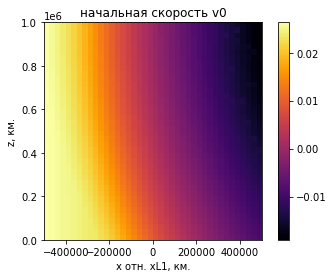

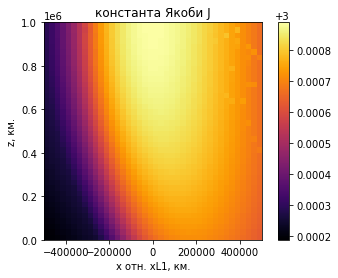

In [31]:
N = 40
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
lim = np.array([- d_g / 2, d_g / 2, 0., d_g]) * R
data = np.load(f'v0_for_{N}.npy')
               
plot_v0_j(data, xs, zs, lim)

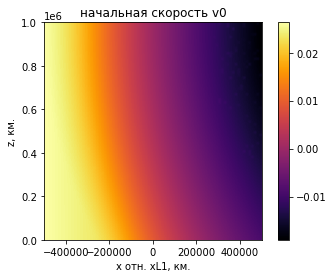

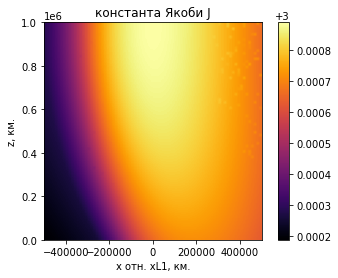

In [32]:
N = 80
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
lim = np.array([- d_g / 2, d_g / 2, 0., d_g]) * R
data = np.load(f'v0_for_{N}.npy')
               
plot_v0_j(data, xs, zs, lim)

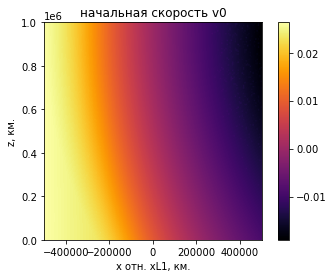

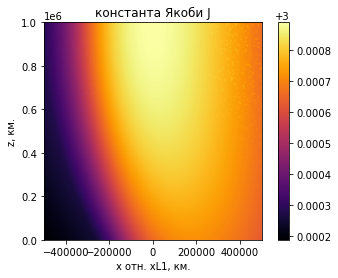

In [33]:
N = 160
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
lim = np.array([- d_g / 2, d_g / 2, 0., d_g]) * R
data = np.load(f'v0_for_{N}.npy')
               
plot_v0_j(data, xs, zs, lim)

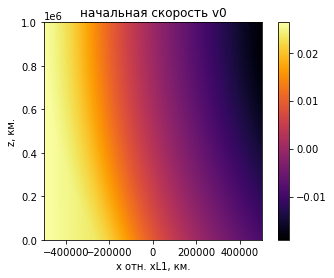

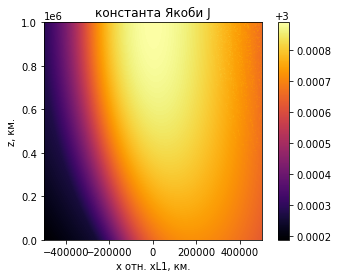

In [34]:
N = 320
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
lim = np.array([- d_g / 2, d_g / 2, 0., d_g]) * R
data = np.load(f'v0_for_{N}.npy')
               
plot_v0_j(data, xs, zs, lim)